In [3]:
# ARIMA


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,8

import warnings
warnings.filterwarnings("ignore")


dataset = pd.read_csv('Airline_Passengers_Dataset.csv')
# Parse strings to datetime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

from datetime import datetime
indexedDataset['1949-03']
indexedDataset['1949-03':'1949-06']
indexedDataset['1949']

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


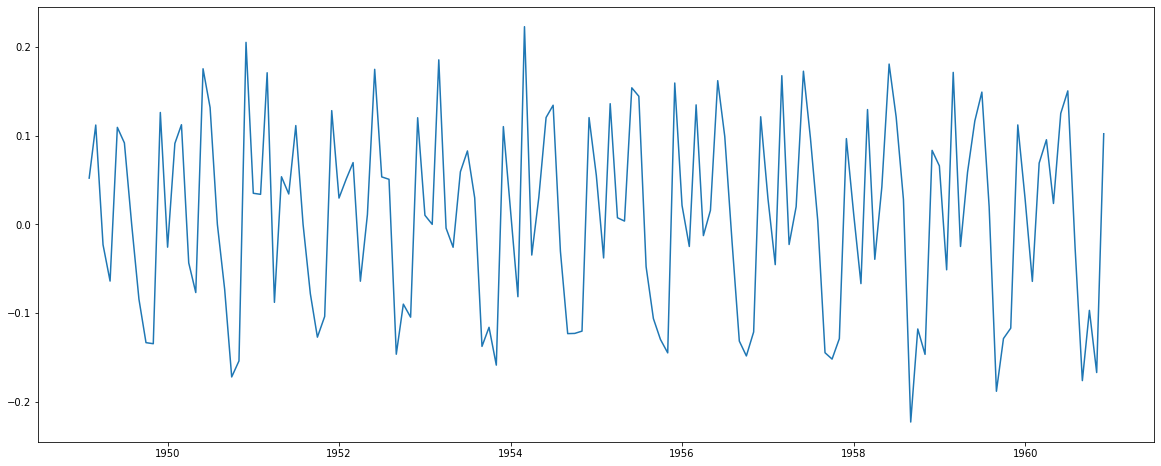

In [4]:
indexedDataset_logScale = np.log(indexedDataset)
#plt.plot(indexedDataset_logScale)

datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift(1)
plt.plot(datasetLogDiffShifting)

datasetLogDiffShifting.dropna(inplace=True)

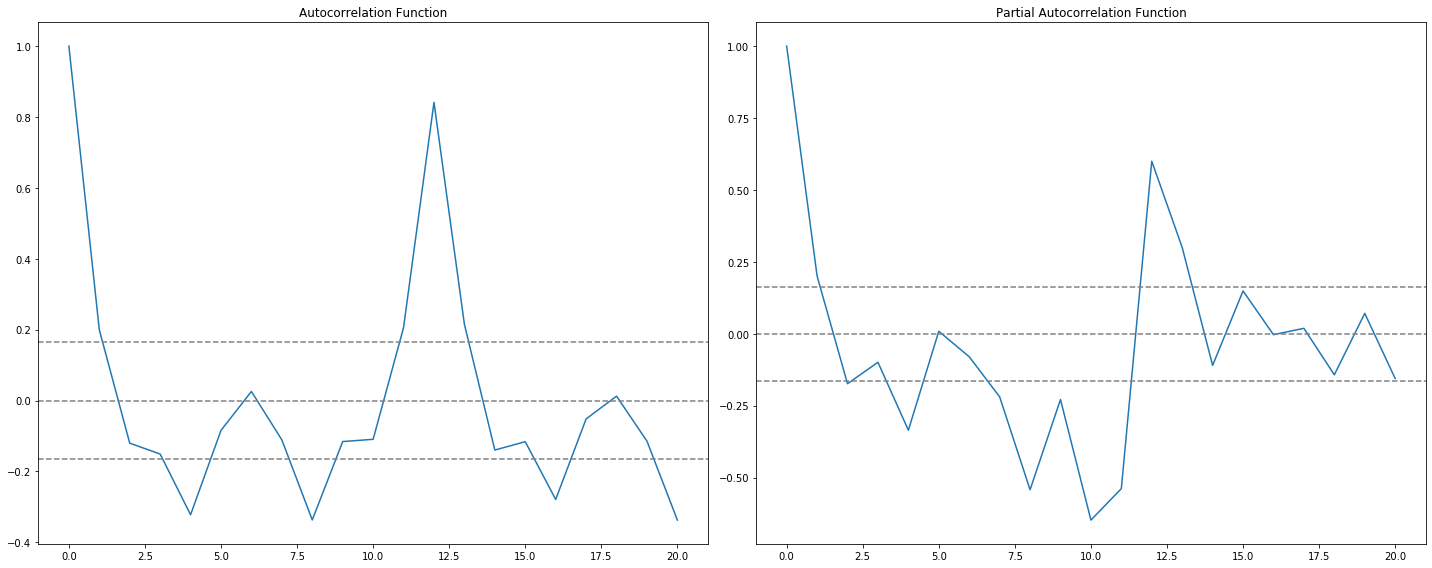

In [5]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


D:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


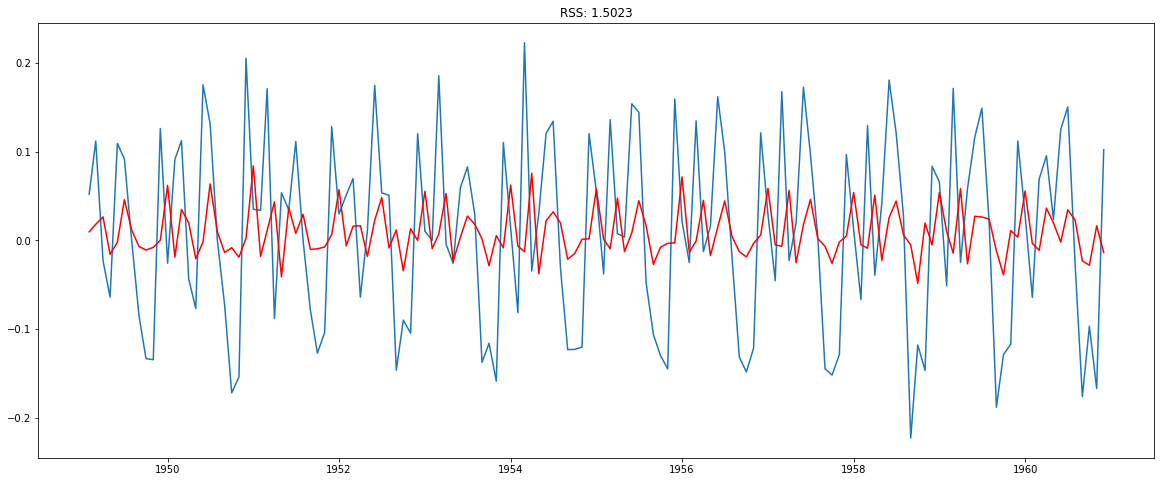

In [6]:
# AR Model

from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting AR model')

D:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


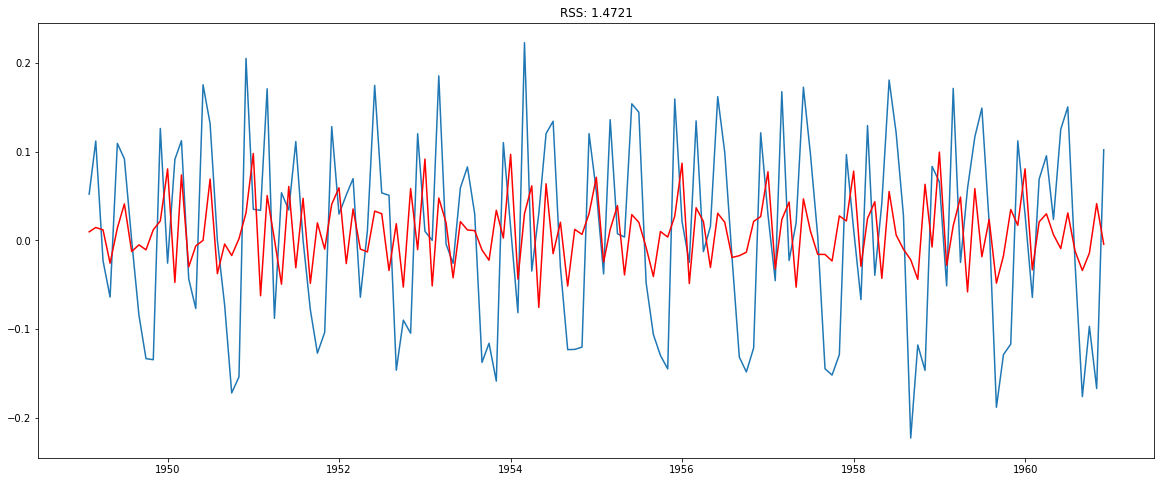

In [7]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))
print('Plotting MA model')

D:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


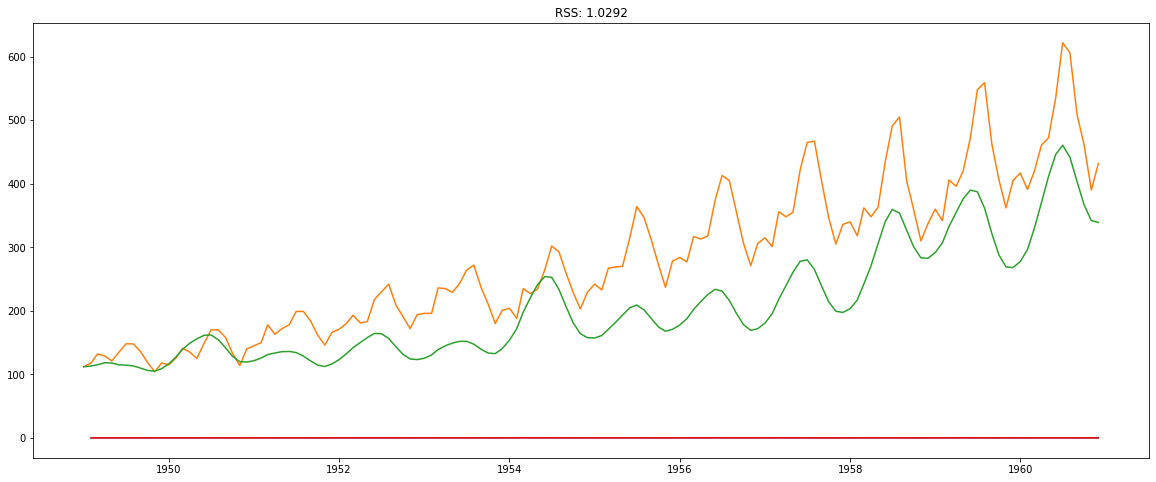

In [8]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["Passengers"])**2))

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Passengers'].ix[0], index=indexedDataset_logScale['Passengers'].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA

plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% sum((predictions_ARIMA-indexedDataset["Passengers"])**2)/len(indexedDataset["Passengers"]))

In [9]:
results_ARIMA.forecast(steps=20)

(array([6.095534  , 6.15281415, 6.22442977, 6.29241109, 6.34164718,
        6.36359357, 6.35784679, 6.33139299, 6.29597541, 6.26447723,
        6.24738344, 6.25025196, 6.27275864, 6.30940338, 6.35151515,
        6.38988671, 6.41727392, 6.43011062, 6.42906698, 6.41842501]),
 array([0.08384711, 0.1074946 , 0.11568691, 0.1170277 , 0.11703492,
        0.11744013, 0.11762245, 0.11778709, 0.12024159, 0.12736039,
        0.13870956, 0.15118788, 0.16157807, 0.16834387, 0.1717732 ,
        0.17311973, 0.17358723, 0.1738545 , 0.17430208, 0.17543323]),
 array([[5.93119668, 6.25987132],
        [5.9421286 , 6.36349969],
        [5.9976876 , 6.45117195],
        [6.063041  , 6.52178117],
        [6.11226295, 6.57103141],
        [6.13341515, 6.593772  ],
        [6.12731102, 6.58838256],
        [6.10053454, 6.56225145],
        [6.06030623, 6.53164459],
        [6.01485546, 6.51409901],
        [5.97551769, 6.51924918],
        [5.95392916, 6.54657476],
        [5.95607143, 6.58944584],
        [5